
## Simulation involving Discreet Random Variables

The simplist outcomes in life are *binary*, that is, there are only 2 *discrete* mutually exclusive possible outcomes. In the animal kingdome, there are often fights to establish position in a social hierarchy, such as a fight to determine the dominant male in a lion pride. At the end of the fight, there is a clear *winner* who maintains or assumes his position as the alpha male, and there is a clear *loser*, who then assumes a subordinate position or, often, if forced to leave the pride.

Local elections, like for a school board member, are another example. People vote, and the candidate that gets the most votes *wins* and the other candidate *loses* – a *binary* outcome. What's interesting about this situation is that each individual voter also produces a *disctete binary* outcome; they either vote for one candidate or the other. Thus, the final binary outcome is actually the result of summing up many individual binary outcomes.

We will begin learning about 
 discrete probability scenarios by simulating very simple situations and seeing what the probability distributions look like when played out over several repeats of simulated experiments. The point of the above examples is to illustrate that the simple situations we will start exploring are actually rather deep, and form the foundation of the techniques that data scientists use to predict things like presidential elections and sporting events – the latter now being a data-science-based [billion dollar industry](https://www.businessofapps.com/data/sports-betting-app-market/#:~:text=%C2%A32.2%20billion-,US%20Sports%20Betting%20App%20Revenue,approximately%2020%25%20of%20global%20revenues.). 


### Objectives:
The objectives of this excercise are three-fold. The first is to expand on our skills of simulating data corresponding to real-world experimental situations.
The second is to use simulations to help us understand the fundamentals of probability, the behavior of random variables, and the use of probability distribution to predict outcomes. Finally, we will see the emergence of the normal distribution from discrete random processes through the Central Limit Theorem.

### Learning Goals:

* Simulating discrete random processes
* Understanding discrete probability distributions
* Gaining a deeper appreciation of Central Limit Theorem 

### Preliminaries:
As always, we'll import our needed libraries.



In [12]:
import numpy as np
import matplotlib.pyplot as plt

Because we're going to be generating a lot of random numbers, let's also import `numpy.random` with its own nickname to save ourselves some typing:

In [13]:
import numpy.random as rnd # random number generation – "rnd" is the conventional nickname

### Two discrete outcomes 

#### Coin Flipping
A very simple propablistic decision that results in a binary outcome is a simple coin flip. Each flip of a coin (or any other probabalitic event that results in one of two outcomes) is referred to as a "Bernoulli trial" (a "trial" being the conventional term in science for procedure that results in a single observation). A series of trials is referred to as an "experiment".

Let's do a single experiment consisting of 100 coin flips (i.e. 100 trials). To do this, were going to use `numpy.random`'s `choice()` function, which chooses items from a list we provide for a specified number of trials. Before you run the code, think about the expected number of heads and tails would be, assuming the coin is fair.

Now pretend you made a little wager with a fried on whether there would be more tails or more heads at the end of the experiment. Go ahead: make a bet, heads or tails?

##### A single coin flipping experiment

In [4]:
rnd.seed(42)     # Set the random seed for reproducibility
n_trials = 100  # Number of trials in our experiment

# Simulate flipping a fair coin 100 times
coin_flips = rnd.choice(['Heads', 'Tails'], size = n_trials) # randomly choose from list n_trials times
heads_count = np.sum(coin_flips == 'Heads')    # count the number of heads
tails_count = np.sum(coin_flips == 'Tails')    # count the number of tails

print(f'Heads: {heads_count}, Tails: {tails_count}')

Heads: 44, Tails: 56


Just for grins, let's make a bar graph of the results. We'll also add a horizontal line to indicate the expected number of heads and tails (`plt` can do a lot for you, so remember to check its methods if you want to make your plots better!).

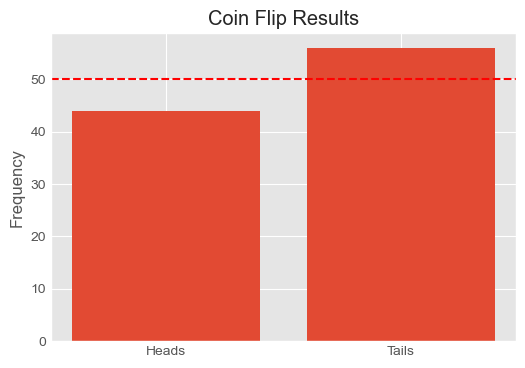

In [19]:
plt.figure(figsize=(6, 4))
plt.bar(['Heads', 'Tails'], [heads_count, tails_count])
plt.axhline(y=50, color='r', linestyle='--')
plt.ylabel('Frequency')
plt.title('Coin Flip Results')
plt.show()

Okay, before we talk about this plot, let's admit to ourselves that it's, well, not exactly pleasing the eye.

We can check for the available plot styles like this:

In [ ]:
plt.style.available

In the code cell below, you can pick whatever style you wish. We've put `ggplot` as a placeholder, but feel free to change it.

In [13]:
plt.style.use('ggplot')

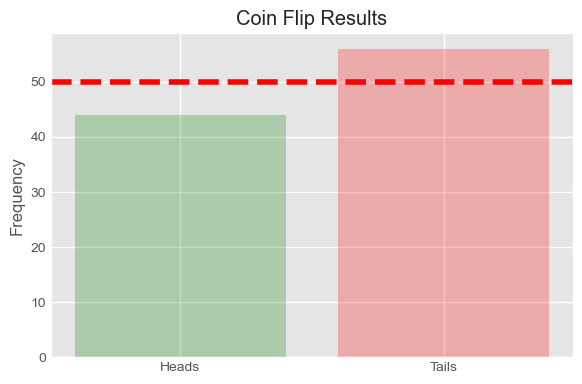

In [48]:
plt.figure(figsize=(6, 4))
plt.bar(['Heads', 'Tails'], [heads_count, tails_count], alpha=0.25, color=['green', 'red'])
plt.axhline(y=50, color='r', linestyle='--')
plt.ylabel('Frequency')
plt.title('Coin Flip Results')
plt.show()

Okay, that's a little easier on the eye...

Now, about the result. Most of us probably guessed "50" as the most probably number of heads, just based on intuition if nothing else (and that actually is the best guess in the sense that it is the guess most likely to be correct). 

But instead, we got 56 tails and 44 heads. Did that surprise you? If your guess was wrong, did you immediately think something like "No way – there's no way that coin is fair" or "I just got swindled!"? Or rather was the result not that surprising to you?

Regardless of what your answer to that last question was, here the more question that's going to lead us to a key concept: 

***At what point would you suspect cheating? In other words, how much a departure from 50/50 would be so large that you would decide the coin wasn't fair***?

Let's put that question a little differently: At what point would a departure from 50/50 have such a low probability of occurring under the "fair coin assumption" that you would assert that the coin wasn't fair after all?

If this sounds familiar, it should (assuming you've had a statistics class). This question falls under the basic "hypothesis testing" framework in which 50/50 would be the "null hypothesis" and the probability mentioned would be called the "p-value".

So, next, let's what the distribution of the number of heads looks if we do many experiments. In other words, let's see what the *sampling distribution* of a bunch of experiments consisting of Bernoulli trials looks like.

##### Many coin flipping experiments

Recall that a sampling distribution is the answer to the question "What would I get if I repeated an experiment a "large" (in the limit, and infinite) number of times. Once you have that, you have a *context* for your actual experimental value. If your value is a "typical" one relative the sampling distribution, then your value most likely came from a populations for which your assumptions were correct. If, however, your experimental value was "rare" – way out on the tail of the sampling distribution – then you might decide the assumptions used to generate the sampling distribution were wrong. 

So, in this case, we'll generate the sampling distribution for the number of heads from experiments with 100 coin flips.

First, we're going to do this "by hand" by recycling the above code and putting it in a `for()` loop. After that, we'll learn a more concise, efficient way to do the same thing.

First, here's the "by hand" version – we'll use 2000 as our "large" number of experiments, since that shouldn't take too long to run:

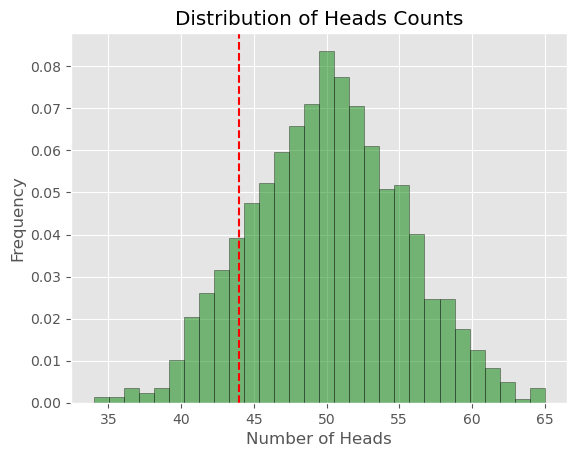

In [14]:
rnd.seed(42)     # Set the random seed for reproducibility
n_trials = 100  # Number of trials in our experiment
n_experiments = 2000 # Number of experiments to perform
n_heads = np.zeros(n_experiments) # Initialize array to store results
# Note that we don't need to store the tails count, 
# since it will always be 100 - n_heads

for i in range(n_experiments):
    # Simulate flipping a fair coin 100 times
    coin_flips = rnd.choice(['Heads', 'Tails'], size = n_trials) # randomly choose from list n_trials times
    heads_count = np.sum(coin_flips == 'Heads')    # number of heads
    n_heads[i] = heads_count    # store the number of heads

# Plot the distribution of heads counts
plt.hist(n_heads, bins = 30, 
         density = True, 
         color = 'green', 
         edgecolor = 'black',
         alpha = 0.5)
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title('Distribution of Heads Counts')

# let's add a vertical line at our original result (44 heads)
plt.axvline(x=44, color='r', linestyle='--')

plt.show()

So what do you think? Should you accuse your friend of cheating? 

---

Before we go on, take the (rather long) code to make our histogram above, and turn it into a function. The function should  take the vector containing the head counts as its input argument, and then it should do the rest! Once you have your function working, play around with bar colors, edge colors, etc. until your function makes histograms that are good looking to you.

---

#### The Binomial Distribution

The distribution of the outcomes of experiments consisting of Bernoulli trials is actually one of the foundational distributions in statistics and data science. It is called the ***binomial*** distribution. As such, any computing environment for data science is going to provide a way so sample from the binomial distribution without having to write a `for()` loop to simulate each experiment. 

Below is code that does the same thing as the above, but it eliminates the `for()` loop and instead calls `rnd.binomial()`. We pass it 3 arguments: the number of trials in each experiment, the probability of a "head" for each Bernoulli trial (i.e. each coin flip), and the number of experiments we wish to run. It will return a vector whose length is the number of experiments you requested, and each element will contain the number of heads obtained in that experiment.  

In [15]:
n_trials = 100             # Number of trials in each experiment
n_experiments = 2000       # Number of experiments to perform
p_head = 0.5               # Assuming a fair coin
# now get the results of all experiments in one function call!
results = rnd.binomial(n=n_trials, p=p_head, size=n_experiments) 

---

In the cell below, use your plotting function to plot a histogram of the `results` from above. Play around with different values of `p_head` and see what it does to the distribution.

---

#### The binomial distribution at large sample sizes – Central Limit Theorem

How do you think the binomial distribution changes as we flip more coins? Let's do several simulations of a bunch of experiments, with each simulation using a different number of coin flips.

In order to make easy & pretty plots of the distributions, let's import the `seaborn` plotting package.

In [21]:
import seaborn as sns

In the code below, we'll use a `for()` loop to do our simulations using various sample sizes (number of coin flips per experiment), then we'll plot each sampling distribution as a KDE (kernel density estimate) which, for now, we can think of as just a smoothed histogram. Plots using overlapping KDEs are just much more visually appealing than plots of overlapping histograms.

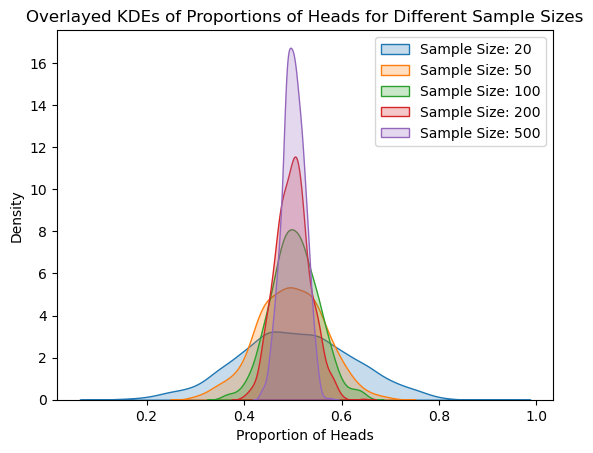

In [22]:
sample_sizes = [20, 50, 100, 200, 500] # Different sample sizes
n_experiments = 1000                   # Number of experiments to perform
p_head = 0.5                           # Assuming a fair coin
for size in sample_sizes:
    results = np.random.binomial(n=size, p=p_head, size=n_experiments)
    proportions = results / size
    sns.kdeplot(proportions, label=f'Sample Size: {size}', alpha=0.25, fill=True)

plt.title('Overlayed KDEs of Proportions of Heads for Different Sample Sizes')
plt.xlabel('Proportion of Heads')
plt.ylabel('Density')
plt.legend()
plt.show()


What do you notice as sample size – the number of coin tosses – increases? Look at the plots and think a bit before reading on...

Okay, 2 main things change as sample size increases; one is obvious, and the other is more subtle.

* First, the sampling distributions get more narrow around the true value. The more the data, the better the estimate.
* Second, the sampling distributions become more and more shaped like a perfect Gaussian distribution!

Both of these things follow directly from Central Limit Theorem. In fact, if the sample size is reasonably large, and the probability of a "head" or "a vote for candidate A" is reasonably near 1/2, the binomial distribution is well approximated by a Gaussian distribution with

* mean = $n*p$ (where *n* is sample size and *p* is the probability of a head)
* standard error = $\sqrt{n*p*(1-p)}$

When you read in the news that a poll has a "margin of error" or 2% or whatever, this approximation is what was used to calculate the margin of error, which is simply the 95% confidence interval on the percentage.

---

#### A Simple Election

In the code cell below...

The results of the simulated elections shouldn't surprising, as they simply reflect the probabilities given by the polls. But when simulating elections with multiple polls, or when the election system is weird, things get more interesting. We'll tackle the latter situation next.

---

#### A More Complicated Election

In the U.S., we don't actually vote directly for our president. Anybody might reasonably think that, when a country elects a president, everybody casts their votes for 1 of 2 candidates, and the candidate with the most votes wins. But that's not the way presidential elections work in the U.S. Instead, each *state* is awarded a certain number of votes for president ("electoral college votes"), and whatever candidates wins a state gets *all the votes for that state*, no matter how slim the margin of victory. So it works like this:

* everybody votes for the president *in their home state*
* the votes are counted on a state by state basis
* the winner in each state gets ***all*** the electoral college votes for that state
* the candidate with the most electoral college votes wins the presidency, regardless of the overall vote total.

(There are currently two exceptions, Maine and Nebraska, which allocate their electoral college votes more proportionally to the will of the voters.)


Below, let's simulate elections in a fictional country with 4 states that uses the electoral college system.

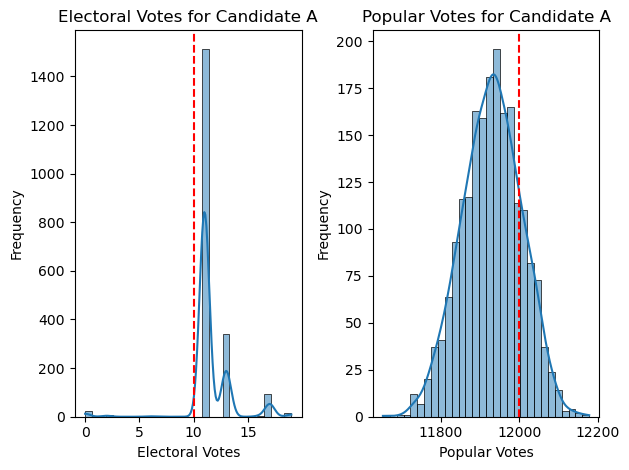

In [8]:
# Setting up the parameters for the simulation
states_populations = np.array([11000, 6000, 2000, 5000])
states_electoral_votes = np.array([11, 6, 2, 5])
states_polls = np.array([0.51, 0.49, 0.49, 0.48])  # Polls for candidate A in each state
num_simulations = 2000

# Arrays to store results
electoral_votes_results = np.zeros(num_simulations)
popular_votes_results = np.zeros(num_simulations)

# Simulation
for i in range(num_simulations):
    electoral_votes_A = 0
    popular_votes_A = 0

    for electoral_votes, population, poll in zip(states_electoral_votes, states_populations, states_polls):
        votes_A = np.random.binomial(population, poll)
        popular_votes_A += votes_A

        # Assigning electoral votes based on majority
        if votes_A > population / 2:
            electoral_votes_A += electoral_votes

    electoral_votes_results[i] = electoral_votes_A
    popular_votes_results[i] = popular_votes_A

# Plotting the results
# Electoral votes
plt.subplot(1, 2, 1)
sns.histplot(electoral_votes_results, kde=True, bins=30)
plt.title('Electoral Votes for Candidate A')
plt.xlabel('Electoral Votes')
plt.ylabel('Frequency')
plt.axvline(x=10, color='r', linestyle='--')

# Popular votes
plt.subplot(1, 2, 2)
sns.histplot(popular_votes_results, kde=True, bins=30)
plt.title('Popular Votes for Candidate A')
plt.xlabel('Popular Votes')
plt.ylabel('Frequency')
plt.axvline(x=12000, color='r', linestyle='--')

plt.tight_layout()
plt.show()


### Multiple Discrete Outomes

Of course, lots of things in life can more than 2 outcomes. For example, there might be 3 candidates running for mayor. Or we might be interested in the total number of special needs students across school districts, where each of several classes in each district have between 2 and 12 students.

Just as we initially used a simple coin to illustrate situations in which each trial had exactly 2 outcomes, we can use dice to illustrate situations in which each trial can have multiple discreet outcomes. This framework essential covers all situations in which we are *counting* things, like number of students, number of patients responding to a treatment, etc.

#### Rolling Dice

1. Simulate rolling a fair six-sided die 100 times.


In [ ]:
# Simulate rolling a fair six-sided die 100 times
dice_rolls = rnd.choice(np.arange(1, 7), size=100)

2. Plot the results in a bar chart showing the frequency of each outcome (1 through 6).



In [ ]:
# Plot the results in a bar chart
plt.figure(figsize=(6, 4))
plt.hist(dice_rolls, bins=np.arange(0.5, 7.5, 1), rwidth=0.8)
plt.xlabel('Dice Roll Outcome')
plt.ylabel('Frequency')
plt.title('Dice Roll Results')
plt.xticks(np.arange(1, 7))
plt.show()

#### Multiple discreet outcomes: Dice Rolls



1. Simulate rolling `k` dice and adding up the scores. Repeat this 1000 times and plot the resulting sums in a histogram.


In [ ]:
# Function to simulate dice rolls and plot the distribution
def plot_dice_roll_distribution(num_dice, trials):
    dice_sums = np.sum(rnd.randint(1, 7, (trials, num_dice)), axis=1)
    plt.hist(dice_sums, bins=np.arange(num_dice, num_dice*6+1)-0.5, density=True)
    plt.xlabel('Sum of Dice Rolls')
    plt.ylabel('Probability')
    plt.title(f'Distribution of Sum of {num_dice} Dice Rolls Over {trials} Trials')
    plt.show()


plot_dice_roll_distribution(2, 1000)


2. Increase `k` incrementally (e.g., 2, 5, 10, 20) and observe how the distribution evolves. Illustrate how, as `k` increases, the distribution approximates a normal distribution.



In [ ]:
# Simulate different numbers of dice
dice_counts = [2, 5, 10, 20]
for num_dice in dice_counts:
    plot_dice_roll_distribution(num_dice, 1000)

### Summary:



